In [5]:
%pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: Cannot install tensorflow[and-cuda]==2.16.1, tensorflow[and-cuda]==2.16.2, tensorflow[and-cuda]==2.17.0, tensorflow[and-cuda]==2.17.1 and tensorflow[and-cuda]==2.18.0 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts



  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
INFO: pip is looking at multiple versions of tensorflow[and-cuda] to determine which version is compatible with other requirements. This could take a while.

The conflict is caused by:
    tensorflow[and-cuda] 2.18.0 depends on nvidia-nccl-cu12==2.21.5; extra == "and-cuda"
    tensorflow[and-cuda] 2.17.1 depends on nvidia-nccl-cu12==2.19.3; extra == "and-cuda"
    tensorflow[and-cuda] 2.17.0 depends on nvidia-nccl-cu12==2.19.3; extra == "and-cuda"
    tensorflow[and-cuda] 2.16.2 depends on nvidia-nccl-cu12==2.19.3; extra == "and-cuda"
    tensorflow[and-cuda] 2.16.1 depends on nvidia-nccl-cu12==2.19.3; extra == "and-cuda"

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict



In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Build the neural network model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))            # Output layer with 1 neuron

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10000, verbose=0)

# Evaluate the model
_, accuracy = model.evaluate(X, y)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X)
predictions = np.round(predictions).astype(int)

print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} => Predicted Output: {predictions[i]}, Actual Output: {y[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7500 - loss: 0.3467
Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predictions:
Input: [0 0] => Predicted Output: [0], Actual Output: [0]
Input: [0 1] => Predicted Output: [0], Actual Output: [1]
Input: [1 0] => Predicted Output: [1], Actual Output: [1]
Input: [1 1] => Predicted Output: [0], Actual Output: [0]


The XOR (exclusive OR) is a simple logic gate problem that cannot be solved using a single-layer perceptron (a basic neural network model). We can solve this using neural networks. Neural networks are powerful tools in machine learning.
Why Single-Layer Perceptrons Fail?
A single-layer perceptron can solve problems that are linearly separable by learning a linear decision boundary.

Mathematically, the decision boundary is represented by:


y=step(w⋅x+b)

Where:

w
w is the weight vector.
x
x is the input vector.
b
b is the bias term.
step
step is the activation function, often a Heaviside step function that outputs 1 if the input is positive and 0 otherwise.
For linearly separable data, the perceptron can adjust the weights 
w
w and bias 
b
b during training to correctly classify the data. However, because XOR is not linearly separable, no single line (or hyperplane) can separate the outputs 0 and 1, making a single-layer perceptron inadequate for solving the XOR problem.

How Multi-Layer Neural Networks Solve XOR?
A multi-layer neural network which is also known as a feedforward neural network or multi-layer perceptron is able to solve the XOR problem. There are multiple layer of neurons such as input layer, hidden layer, and output layer.

The working of each layer:

Input Layer: This layer takes the two inputs (A and B).
Hidden Layer: This layer applies non-linear activation functions to create new, transformed features that help separate the classes.
Output Layer: This layer produces the final XOR result.

Geometric Interpretation
In the hidden layer, the network effectively transforms the input space into a new space where the XOR problem becomes linearly separable. This can be visualized as bending or twisting the input space such that the points corresponding to different XOR outputs (0s and 1s) are now separable by a linear decision boundary.


Conclusion
The XOR problem is a classic example that highlights the limitations of simple neural networks and the need for multi-layer architectures. By introducing a hidden layer and non-linear activation functions, an MLP can solve the XOR problem by learning complex decision boundaries that a single-layer perceptron cannot. Understanding this solution provides valuable insight into the power of deep learning models and their ability to tackle non-linear problems in various domains.


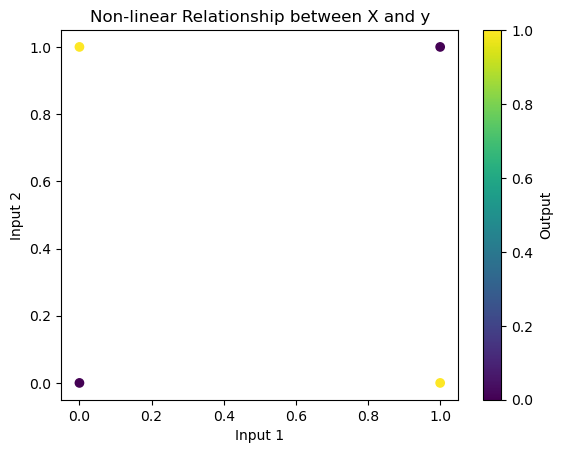

In [8]:
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('Non-linear Relationship between X and y')
plt.colorbar(label='Output')
plt.show()

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

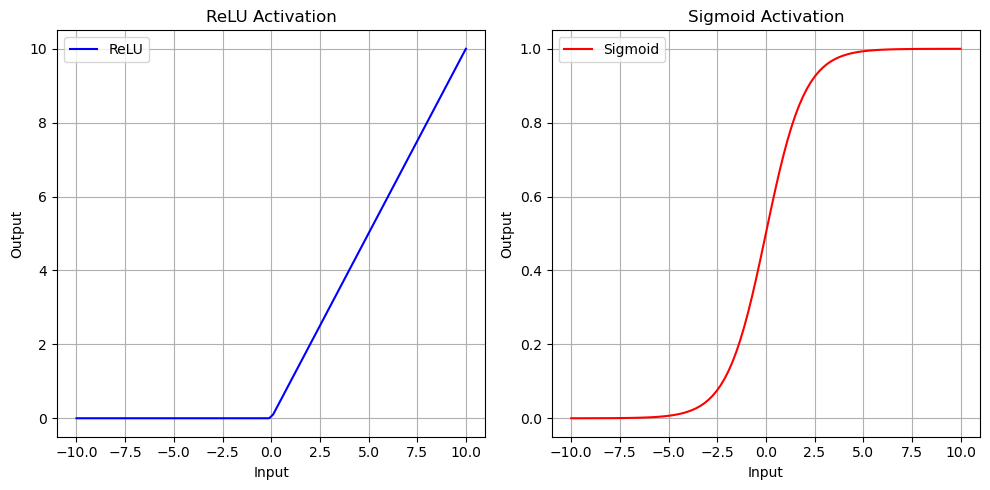

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define input range
x = np.linspace(-10, 10, 100)

# Define activation functions
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))

# Plot ReLU and Sigmoid
plt.figure(figsize=(10, 5))

# ReLU plot
plt.subplot(1, 2, 1)
plt.plot(x, relu, label="ReLU", color="blue")
plt.title("ReLU Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()

# Sigmoid plot
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid, label="Sigmoid", color="red")
plt.title("Sigmoid Activation")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
